<p style="background-color:orange;font-family:newtimeroman;font-size:200%;color:black;text-align:center;border-radius:40px 20px;"><b>KNN (K-Nearest Neighbors)</b></p>

**K-Nearest Neighbors (KNN) Algorithm**

k-Nearest Neighbors (KNN) is one of the simplest and most intuitive machine learning algorithms used for both classification and regression tasks. Despite its simplicity, KNN can be quite effective in various scenarios. Here is a detailed explanation of KNN:
**
**Overview**
KNN is a non-parametric, instance-based learning algorithm. Unlike other supervised learning algorithms, KNN does not involve a training phase where a model is explicitly built. Instead, the algorithm relies directly on the entire dataset, making it a type of lazy learning.

**How KNN Works**
The core idea of KNN is to identify the 'k' nearest neighbors to a new, unknown data point, and then make predictions based on these neighbors. Here’s how it works:

1. **Distance Measurement**:
   - When a new data point needs to be classified or a value needs to be predicted, KNN calculates the distance between this point and all other points in the training dataset. Common distance metrics include Euclidean, Manhattan, and Minkowski distances.

2. **Neighbor Selection**:
   - The algorithm selects the 'k' nearest neighbors based on the calculated distances. The value of 'k' is a user-defined parameter and typically an odd number to avoid ties.

3. **Prediction**:
   - **Classification**: The new data point is assigned to the class that is most common among its 'k' nearest neighbors. This is done using a majority voting system.
   - **Regression**: The value of the new data point is predicted by averaging the values of its 'k' nearest neighbors.

**Characteristics of KNN**
- **Lazy Learning**: KNN does not involve a training phase. Instead, it memorizes the training dataset, and all computations are deferred until a prediction is needed.
- **Non-Parametric**: KNN does not assume any specific form for the underlying data distribution. It makes predictions based solely on the similarity of data points.
- **Simple and Intuitive**: The concept of finding the nearest neighbors is easy to understand and implement.
- **Computationally Intensive**: Since KNN involves calculating distances for all data points, it can be slow and inefficient for large datasets.

**Choosing the Value of 'k'**
- The performance of KNN largely depends on the choice of 'k'.
- **Small 'k'**: A small value of 'k' can lead to a model that is sensitive to noise in the data.
- **Large 'k'**: A large value of 'k' can smooth out noise but may also blur the distinctions between different classes.

**Advantages**
- **No Training Phase**: Eliminates the need for a training phase, making it quick to set up.
- **Adaptable**: Can be used for both classification and regression.
- **Versatile**: Effective for a wide range of problems if distance metric and 'k' value are chosen appropriately.

**Disadvantages**
- **Computational Cost**: High computational cost during prediction as it involves calculating distances for all data points.
- **Storage Requirements**: Requires storing the entire training dataset.
- **Sensitivity to Irrelevant Features**: Performance can degrade if the dataset has many irrelevant or redundant features.

**Practical Applications**
- **Recommendation Systems**: Used to recommend items based on user similarity.
- **Pattern Recognition**: Applied in image and speech recognition.
- **Medical Diagnosis**: Helps in classifying patients into different categories based on historical medical data.egories based on historical medical data.

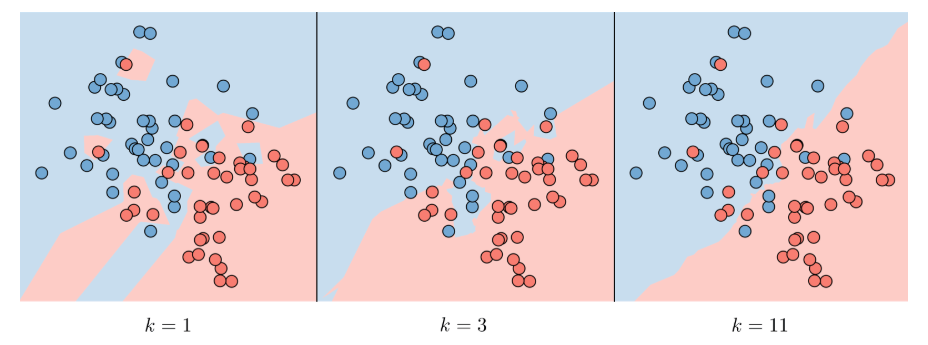

# <font color='orange'> <b>Importing Libraries</b><font color='black'>  

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score, recall_score, precision_score

plt.rcParams["figure.figsize"] = (8, 6)

import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# <font color='orange'> <b>Loading The Dataset</b><font color='black'>  

In [12]:
df = pd.read_csv("gene_expression.csv")
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [14]:
df.sample(5)

,Gene One,Gene Two,Cancer Present
10,6.6,2.9,1
205,3.7,5.8,0
1181,3.8,8.4,0
1165,6.9,4.4,1
2309,5.8,5.8,0


# <font color='orange'> <b>Understanding Data & EDA</b><font color='black'>  

In [19]:
df.shape

(3000, 3)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gene One,3000.0,5.600133,1.828388,1.0,4.3,5.6,6.9,10.0
Gene Two,3000.0,5.410467,1.729081,1.0,4.0,5.4,6.7,10.0
Cancer Present,3000.0,0.500000,0.500083,0.0,0.0,0.5,1.0,1.0


In [27]:
df["Cancer Present"].value_counts()

# Balanced data

Cancer Present
1    1500
0    1500
Name: count, dtype: int64

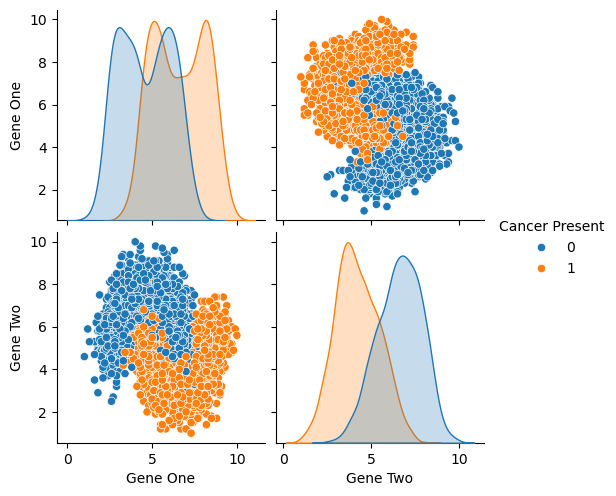

In [31]:
sns.pairplot(df, hue='Cancer Present');

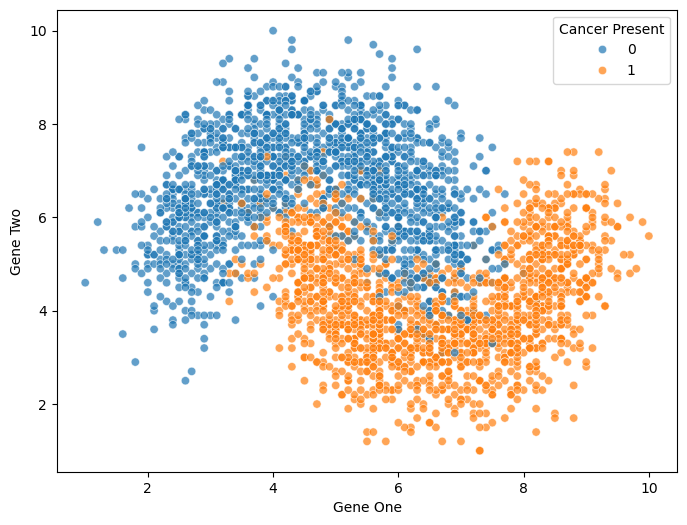

In [35]:
sns.scatterplot(x = "Gene One", y = "Gene Two", hue = "Cancer Present", data = df, alpha = 0.7);

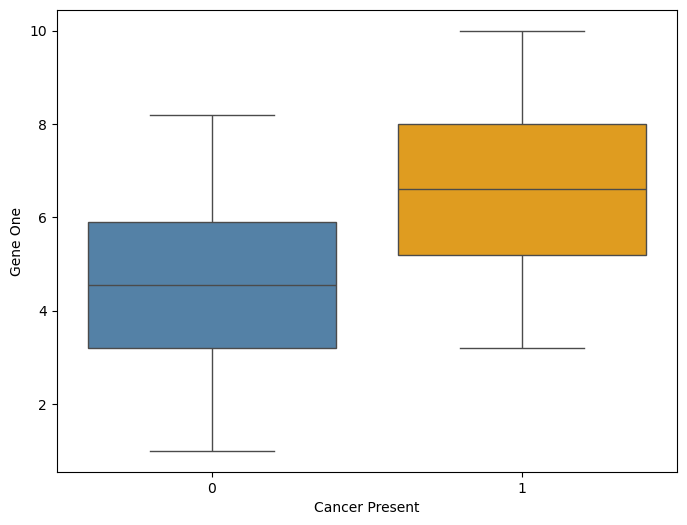

In [49]:
sns.boxplot(x = "Cancer Present", y = "Gene One", data = df, palette=["steelblue", "orange"]);

# As Gene One grows, the risk of getting cancer increases.
# We can get the insights we get from Pairplot here too. 
# In the case of Gene One, the two classes overlap more with each other than in Gene Two.

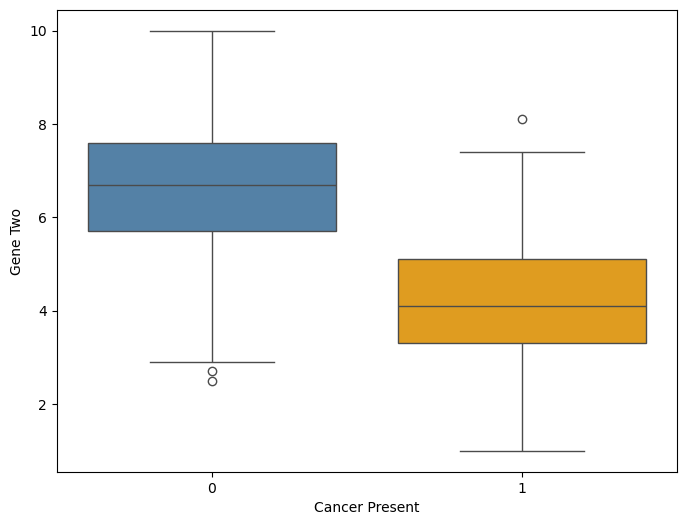

In [53]:
sns.boxplot(x = "Cancer Present", y = "Gene Two", data = df, palette=["steelblue", "orange"]);

# As Gene Two gets smaller, the risk of cancer increases.
# In the case of Gene Two, the 2 classes intersect less with each other than in Gene One.

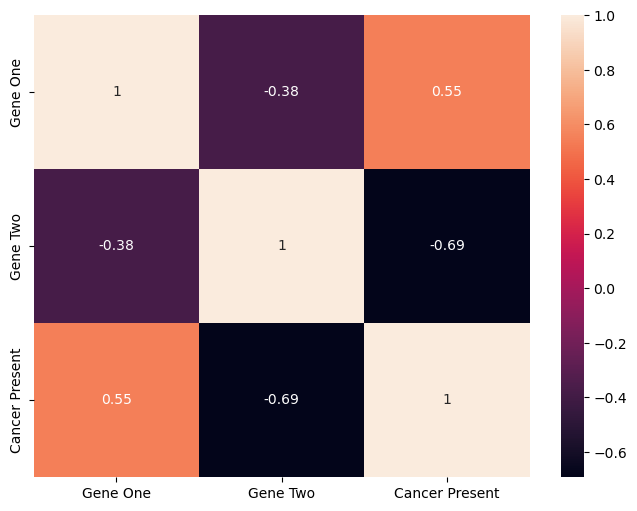

In [55]:
sns.heatmap(df.corr(), annot = True);

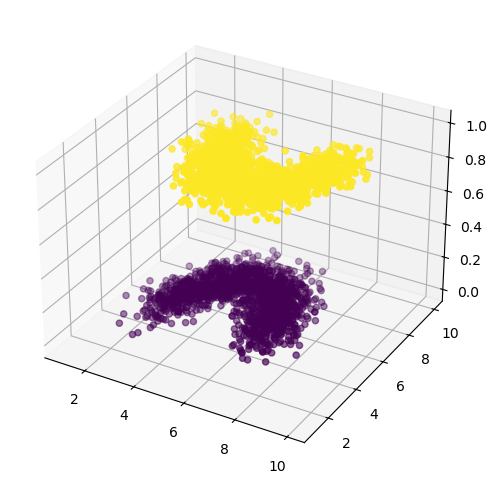

In [59]:
%matplotlib inline
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Gene One'], df['Gene Two'], df['Cancer Present'],c=df['Cancer Present'])
plt.show()

# <font color='orange'> <b>Modeling</b><font color='black'>  

In [63]:
X = df.drop(columns="Cancer Present")
y = df["Cancer Present"]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))] # n_neighbors=5 is default value.

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [69]:
y_pred = pipe_model.predict(X_test)
y_pred_proba = pipe_model.predict_proba(X_test)

In [71]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}
pd.DataFrame(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
765,0,0,0.0,1.0
1149,1,1,0.8,0.2
2619,0,0,0.0,1.0
221,1,0,0.4,0.6
2881,1,1,1.0,0.0
1752,1,0,0.2,0.8
231,1,1,1.0,0.0
2781,0,0,0.0,1.0
1779,0,0,0.0,1.0
2138,1,1,1.0,0.0


# <font color='orange'> <b>Model Performance on Classification Tasks</b><font color='black'>  

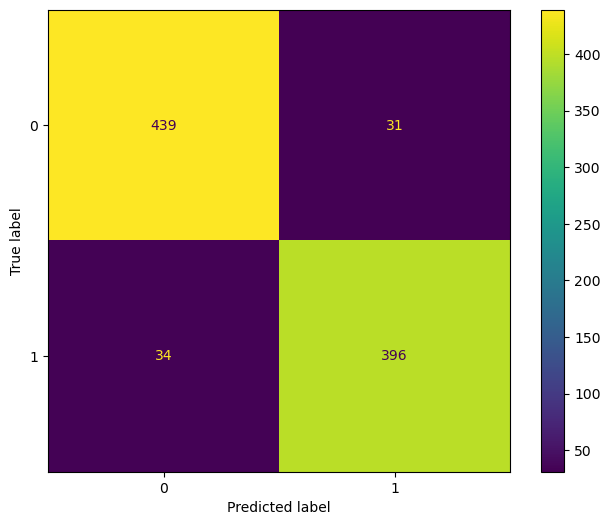

In [73]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test);

In [75]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[439  31]
 [ 34 396]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.93      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900


Train_Set
[[ 971   59]
 [  61 1009]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1030
           1       0.94      0.94      0.94      1070

    accuracy                           0.94      2100
   macro avg       0.94      0.94      0.94      2100
weighted avg       0.94      0.94      0.94      2100



## <font color='gold'> <b>Elbow Method for Choosing Reasonable K Values</b><font color='black'>  

The KNN Elbow Method is a technique used to determine the optimal k value in the k-Nearest Neighbors (KNN) algorithm. This method calculates training and validation errors for different k values and visualizes how the errors change. The goal is to find the point where the errors significantly decrease and then level off. This point is often referred to as the "elbow" and represents the optimal k value.

**How It Works:**
1. **Different k Values:** Select a range of k values (e.g., from 1 to 20).
2. **Error Calculation:** Train the model for each k value and calculate training and validation errors.
3. **Visualization:** Plot the errors (k-error graph). Look for a distinct elbow point in the graph.
4. **Elbow Point:** Identify the k value where the errors rapidly decrease and then stabilize.

**Advantages:**
- **Reducing Complexity:** Selecting the optimal k value can reduce the model's complexity and computational cost.
- **Improving Model Performance:** The correct k value can enhance the model's accuracy and overall performance.

**Disadvantages:**
- **Visual Interpretation:** Determining the elbow point requires visual interpretation and may not always be clearly identifiable.

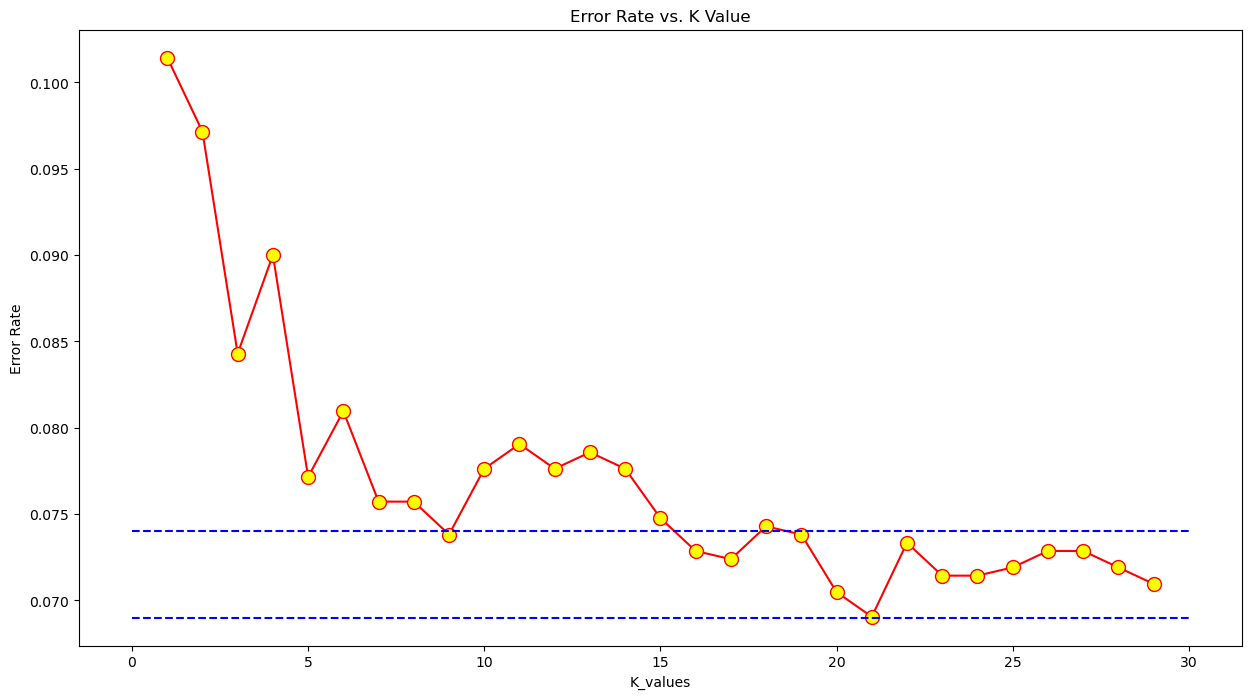

In [81]:
test_error_rates = []

for k in range(1, 30):
    operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]
    knn_pipe_model = Pipeline(steps=operations)
    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring = ['accuracy'], cv = 10)
    accuracy_mean = scores["test_accuracy"].mean()
    test_error = 1 - accuracy_mean
    test_error_rates.append(test_error)

# To choose the optimum K value, we can first use accuracy if our data set is balanced, and the recall metric of the target class if it is unbalanced.

# For each number of neighbors (between 1-30) we first find the accuracy score and then subtract this score from 1 to find the error score for each K value.

# Since the most optimal K value we will find in the test data set (hold-out set) may cause data leakage problems //
# //we will use our train data set in CV and make a decision based on the average error scores of the validation sets here.

# Plotting errors
plt.figure(figsize=(15, 8))
plt.plot(range(1, 30),
         test_error_rates,
         color='red',
         marker='o',
         markerfacecolor='yellow',
         markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.074, xmin=0, xmax=30, colors='b', linestyles="--")
plt.hlines(y=0.069, xmin=0, xmax=30, colors='b', linestyles="--")
plt.show()

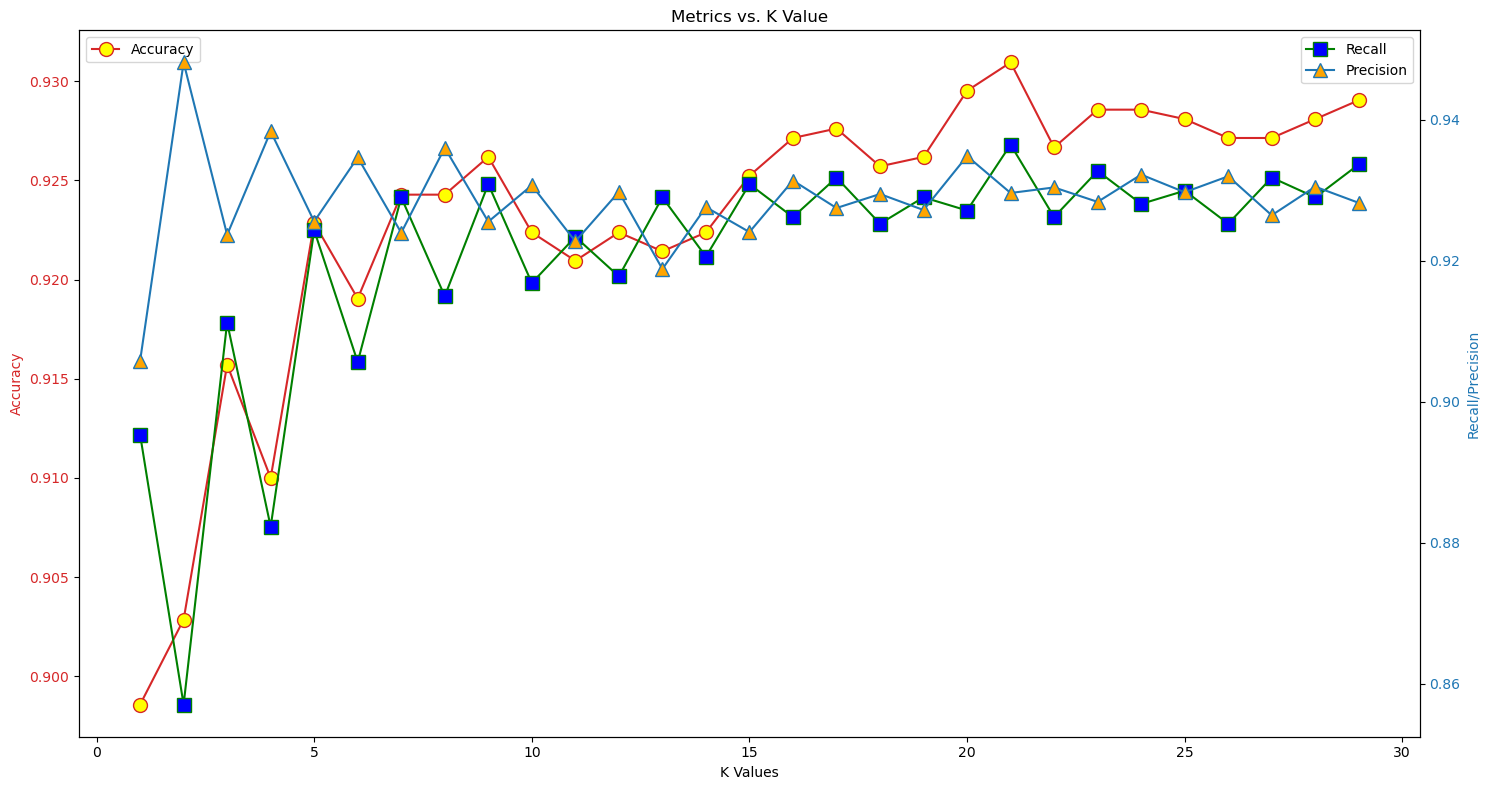

In [83]:
from sklearn.metrics import make_scorer

accuracy_scores = []
recall_scores = []
precision_scores = []

for k in range(1, 30):
    operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]
    knn_pipe_model = Pipeline(steps=operations)
    
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'recall': make_scorer(recall_score),
        'precision': make_scorer(precision_score)
    }
    
    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring=scoring, cv=10)
    
    accuracy_mean = scores["test_accuracy"].mean()
    recall_mean = scores["test_recall"].mean()
    precision_mean = scores["test_precision"].mean()
    
    accuracy_scores.append(accuracy_mean)
    recall_scores.append(recall_mean)
    precision_scores.append(precision_mean)

fig, ax1 = plt.subplots(figsize=(15, 8))

color = 'tab:red'
ax1.set_xlabel('K Values')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(range(1, 30), accuracy_scores, color=color, marker='o', markerfacecolor='yellow', markersize=10, label='Accuracy')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Recall/Precision', color=color)
ax2.plot(range(1, 30), recall_scores, color='green', marker='s', markerfacecolor='blue', markersize=10, label='Recall')
ax2.plot(range(1, 30), precision_scores, color=color, marker='^', markerfacecolor='orange', markersize=10, label='Precision')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Metrics vs. K Value')
fig.tight_layout()
plt.show()

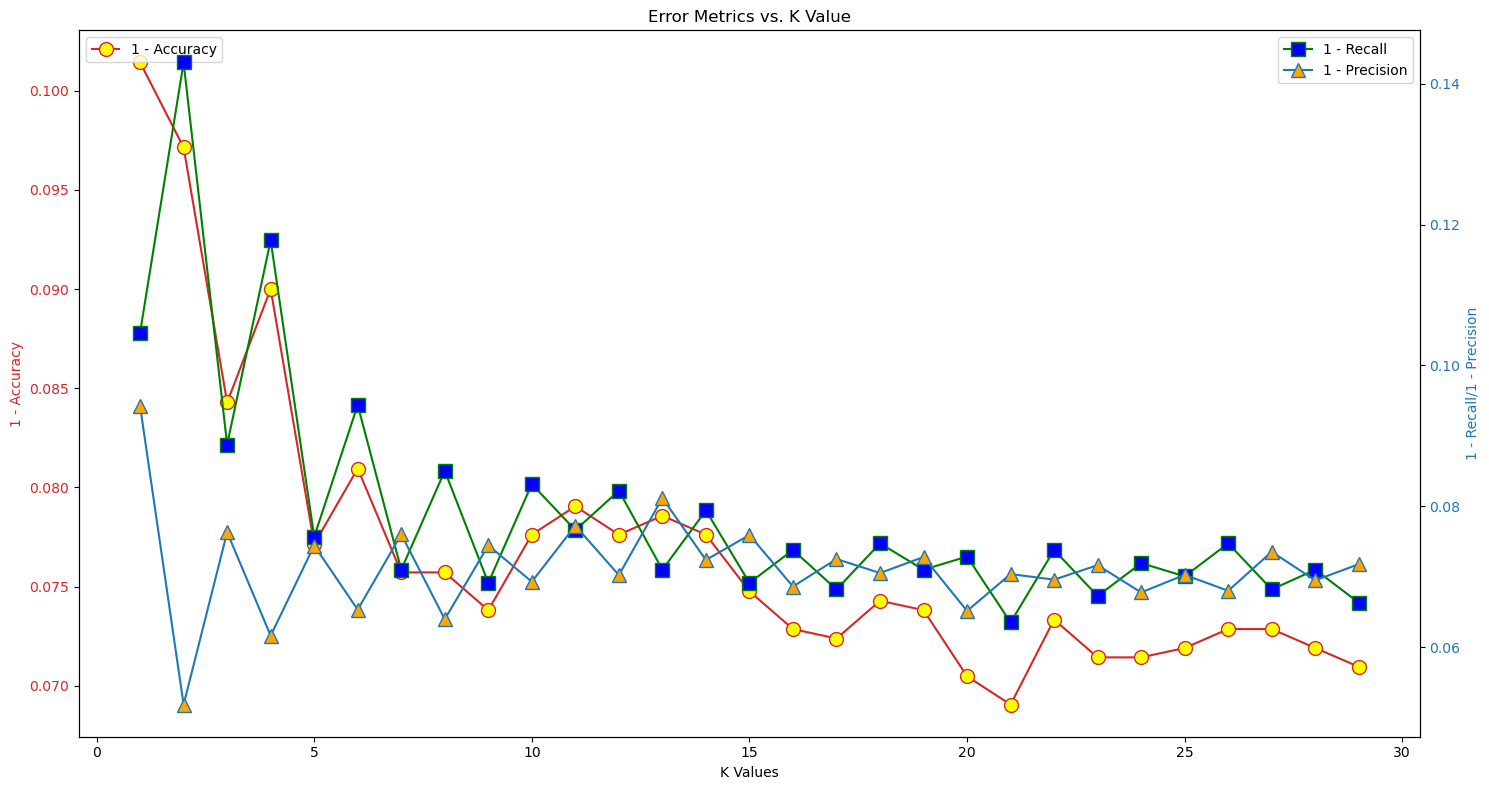

In [85]:
accuracy_errors = []
recall_errors = []
precision_errors = []

for k in range(1, 30):
    operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]
    knn_pipe_model = Pipeline(steps=operations)
    
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'recall': make_scorer(recall_score),
        'precision': make_scorer(precision_score)
    }
    
    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring=scoring, cv=10)
    
    accuracy_mean = scores["test_accuracy"].mean()
    recall_mean = scores["test_recall"].mean()
    precision_mean = scores["test_precision"].mean()
    
    accuracy_errors.append(1 - accuracy_mean)
    recall_errors.append(1 - recall_mean)
    precision_errors.append(1 - precision_mean)

fig, ax1 = plt.subplots(figsize=(15, 8))

color = 'tab:red'
ax1.set_xlabel('K Values')
ax1.set_ylabel('1 - Accuracy', color=color)
ax1.plot(range(1, 30), accuracy_errors, color=color, marker='o', markerfacecolor='yellow', markersize=10, label='1 - Accuracy')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('1 - Recall/1 - Precision', color=color)
ax2.plot(range(1, 30), recall_errors, color='green', marker='s', markerfacecolor='blue', markersize=10, label='1 - Recall')
ax2.plot(range(1, 30), precision_errors, color=color, marker='^', markerfacecolor='orange', markersize=10, label='1 - Precision')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Error Metrics vs. K Value')
fig.tight_layout()
plt.show()

## <font color='gold'> <b>Overfiting and underfiting control for k values</b><font color='black'>  

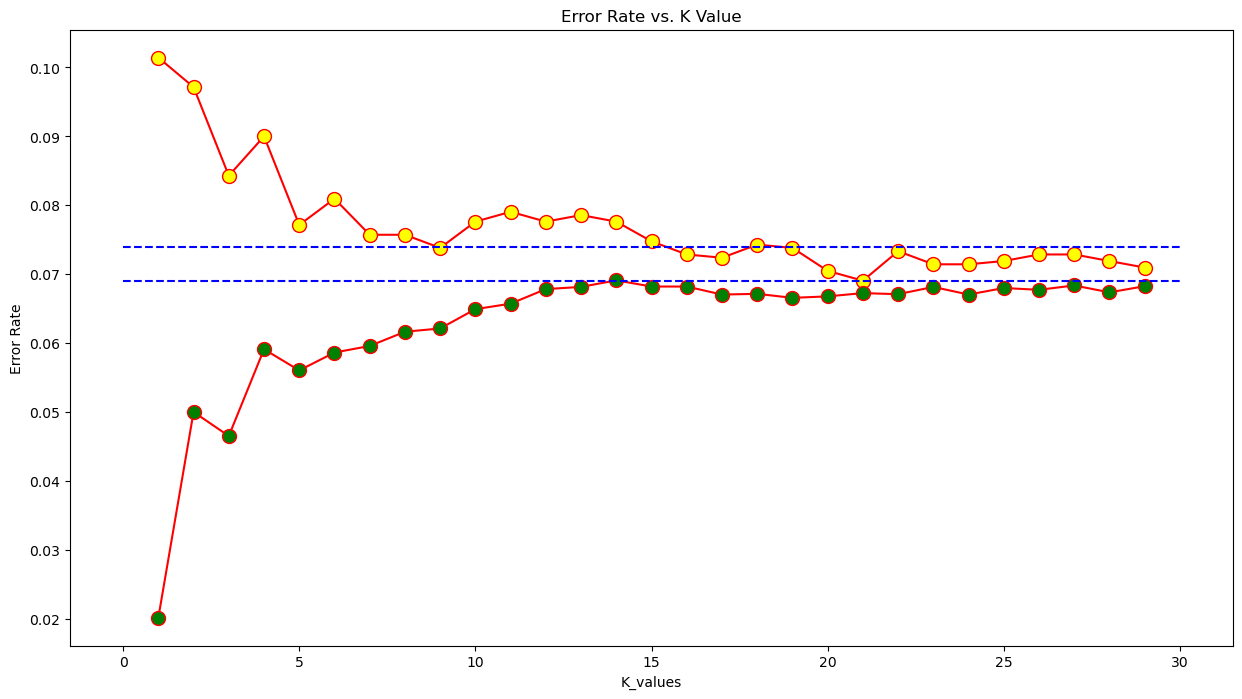

In [89]:
test_error_rates = []
train_error_rates = []

for k in range(1,30):
    
    operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]

    knn_pipe_model = Pipeline(steps=operations)
    
    knn_pipe_model.fit(X_train,y_train) 
    
    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring = ['accuracy'], cv = 10, return_train_score=True)
    
    accuracy_test_mean = scores["test_accuracy"].mean() 
    accuracy_train_mean = scores["train_accuracy"].mean() 

    test_error = 1 - accuracy_test_mean
    train_error = 1 - accuracy_train_mean
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)
# We compare the average error errors of the validation and train data we obtained from the train data we provided in the CV, in the same process as above. 
# This way we will be able to see more easily whether there is overfitting or not.


# Plotting
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='red', marker='o',
         markerfacecolor='yellow', markersize=10)

plt.plot(range(1,30), train_error_rates, color='red', marker='o',
         markerfacecolor='green', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.074, xmin = 0, xmax = 30, colors= 'b', linestyles="--")
plt.hlines(y=0.069, xmin = 0, xmax = 30, colors= 'b', linestyles="--")
plt.show()

# Yellows are validation data, greens are train data scores.

# The lowest error score for the validation data was obtained at K = 21, but if we choose 21, the complexity of the model and the running cost will increase significantly. 
# For K= 9 the error is 0.074, while for K=21 the error is 0.069. 
# Is it worth risking such complexity, that is, working costs, for a difference of 0.005? This is a question we need to consider.  
# It's not worth paying this much for a difference of 0.005.

# At K=21, the error scores in both validation and train data are almost the same. 
# However, if K=9, the error score of the validation data is 0.074 while the error score of the train data is 0.060. 
# The difference is 0.014. So, since the difference is very small, we can choose K=9 with peace of mind.

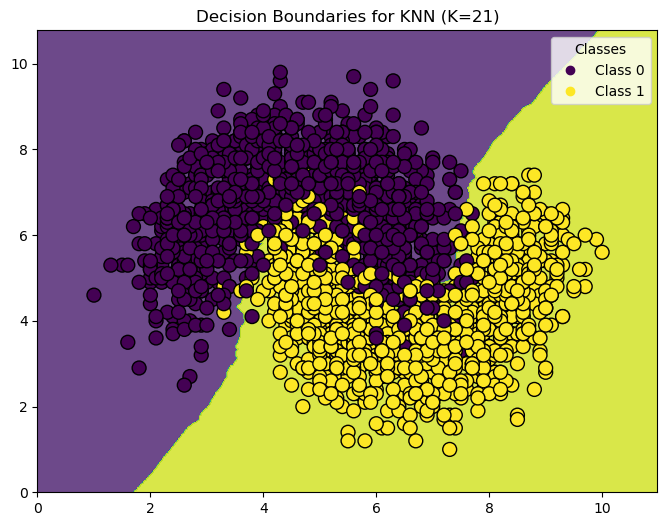

In [92]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=21))]
knn_pipe_model = Pipeline(steps=operations)
knn_pipe_model.fit(X_train, y_train)

h = .02  

x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_pipe_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)

scatter = plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolors='k', marker='o', s=100)

plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1', 'Class 2'], loc='upper right', title="Classes")
plt.title(f"Decision Boundaries for KNN (K=21)")
plt.show()

**------------------------------------------------------------------------------------------------------------------------**

**for k=5**

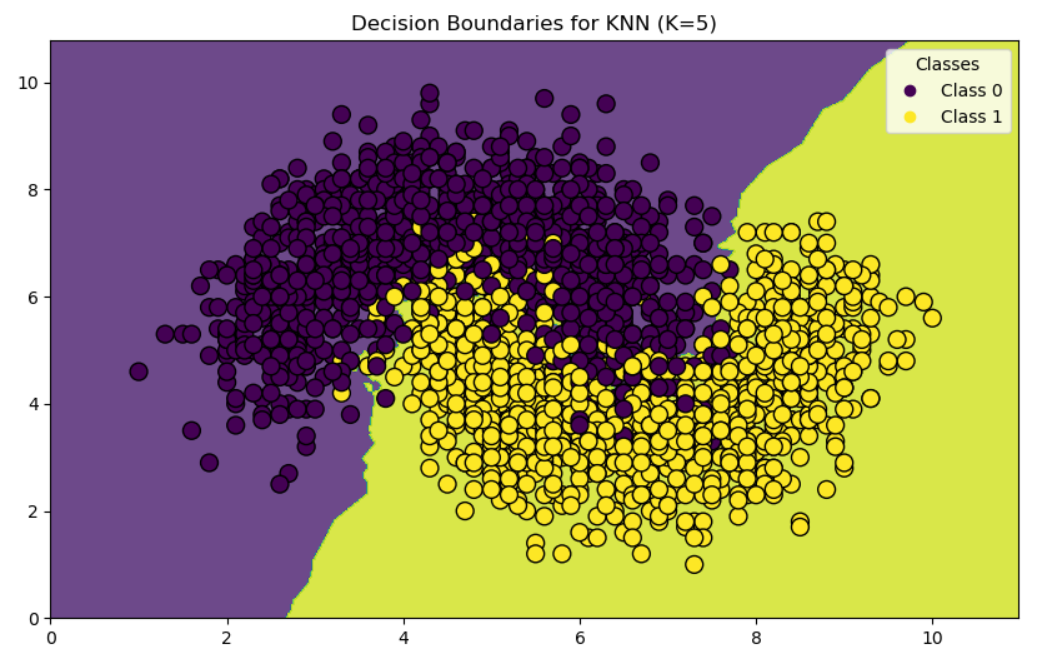

## <font color='gold'> <b>Scores by Various K Values</b><font color='black'>  

In [100]:
k_list = [3, 6, 9, 16, 19, 20, 22]
 
for i in k_list:
    operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=i))]
    knn = Pipeline(steps=operations)
    knn.fit(X_train, y_train)
    print(f'WITH K={i}\n')
    eval_metric(knn, X_train, y_train, X_test, y_test)

WITH K=3

Test_Set
[[437  33]
 [ 33 397]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.92      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900


Train_Set
[[ 979   51]
 [  46 1024]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1030
           1       0.95      0.96      0.95      1070

    accuracy                           0.95      2100
   macro avg       0.95      0.95      0.95      2100
weighted avg       0.95      0.95      0.95      2100

WITH K=6

Test_Set
[[448  22]
 [ 36 394]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.93       430

    accuracy                           0.94       900
   mac

## <font color='gold'> <b>Cross Validate For Optimal K Value</b><font color='black'>  

In [103]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=9))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.926190
train_accuracy     0.937884
test_precision     0.925515
train_precision    0.936609
test_recall        0.930841
train_recall       0.941848
test_f1            0.927874
train_f1           0.939216
dtype: float64

## <font color='gold'> <b>Gridsearch Method for Choosing Reasonable K Values</b><font color='black'>  

**Hyperparameters of the K-Nearest Neighbors (KNN) Algorithm**

The KNN algorithm can be configured with a set of parameters. These parameters can affect the performance and accuracy of the model.

**Explanation of Hyperparameters**

1. **n_neighbors**:
   - **Number of neighbors (K)**.
   - Determines the number of neighbors used to classify or predict a new data point.
   - Setting an appropriate value can impact the success of the model.
   - Typically, a small and odd value is preferred.

2. **weights**:
   - **Method for weighting neighbors' contributions**.
   - **"uniform"**: Each neighbor has equal weight.
   - **"distance"**: Weights are proportional to the inverse of their distance.

3. **algorithm**:
   - **Method to compute the nearest neighbors**.
   - Options: **"auto"**, **"ball_tree"**, **"kd_tree"**, **"brute"**.
   - **"auto"**: Automatically selects the best algorithm based on the dataset.
   - **"ball_tree"** and **"kd_tree"**: Fast neighbor search.
   - **"brute"**: Performs exhaustive search by comparing all points.

4. **leaf_size**:
   - **Leaf size in "ball_tree" or "kd_tree" algorithms**.
   - Larger leaf size may reduce memory usage but can slow down the search.

5. **p**:
   - **Type of distance metric**.
   - **p = 1**: Manhattan distance.
   - **p = 2**: Euclidean distance.
   - The Minkowski distance is a general form that includes both metrics.

6. **metric**:
   - **Defines the distance metric**.
   - Default is **"minkowski"**, which represents Manhattan or Euclidean distance based on **p**.
   - Other options: **"manhattan"**, **"euclidean"**, **"cosine"**, etc.

7. **metric_params**:
   - **Additional parameters for the distance metric**.
   - For example, the covariance matrix for Mahalanobis distance.

8. **n_jobs**:
   - **Number of parallel jobs to run**.
   - **n_jobs = -1**: Uses all processor cores.

These parameters can be fine-tuned to optimize the performance of the KNN algorithm for specific datasets and tasks.

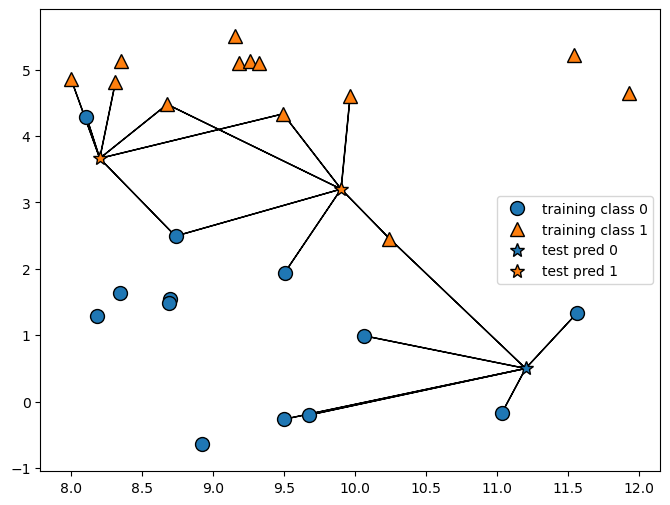

In [115]:
import mglearn

# Shows the distances selected according to the k parameter.
mglearn.plots.plot_knn_classification(n_neighbors=6)
plt.show()

In binary problems:
- k parameter is **even number**,
- The weight parameter is required to be **uniform**.

In [117]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]

knn_model = Pipeline(steps=operations)

In [119]:
knn_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [121]:
# Creating param_grid variable
param_grid = [
    {
        "knn__n_neighbors": range(1, 30),
        "knn__metric": ['euclidean', 'manhattan'],
        "knn__weights": ['uniform', 'distance']
    },
    {
        "knn__n_neighbors": range(1, 30),
        "knn__metric": ['minkowski'],
        "knn__p": [1, 2],
        "knn__weights": ['uniform', 'distance']
    }
]

# Grid model
knn_grid_model = GridSearchCV(knn_model,
                              param_grid,
                              cv=5,
                              scoring= "accuracy",
                              return_train_score=True
                             )

# Grid model fitting
knn_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=[{'knn__metric': ['euclidean', 'manhattan'],
                          'knn__n_neighbors': range(1, 30),
                          'knn__weights': ['uniform', 'distance']},
                         {'knn__metric': ['minkowski'],
                          'knn__n_neighbors': range(1, 30), 'knn__p': [1, 2],
                          'knn__weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='accuracy')

In [123]:
knn_grid_model.best_params_

{'knn__metric': 'euclidean', 'knn__n_neighbors': 20, 'knn__weights': 'uniform'}

In [125]:
eval_metric(knn_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[451  19]
 [ 29 401]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900


Train_Set
[[964  66]
 [ 73 997]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1030
           1       0.94      0.93      0.93      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



In [127]:
# for k=9
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=9))]

knn9 = Pipeline(steps=operations)

knn9.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

## <font color='gold'> <b>Evaluating ROC Curves and AUC</b><font color='black'>  

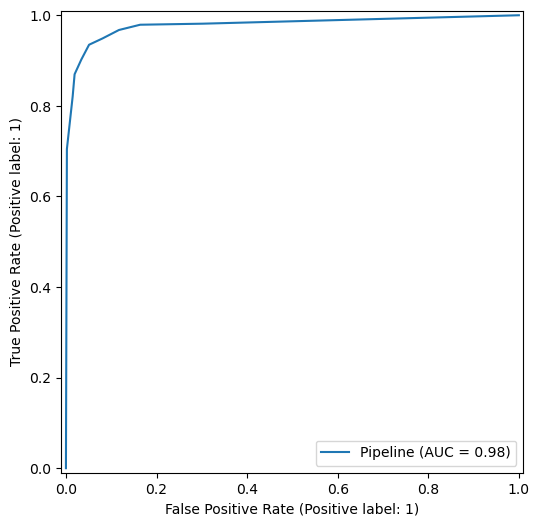

In [130]:
# for k=9
RocCurveDisplay.from_estimator(knn9, X_test, y_test);

In [132]:
# The AUC value for k=9
y_pred_proba = knn9.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:,1])

0.9781296387926769

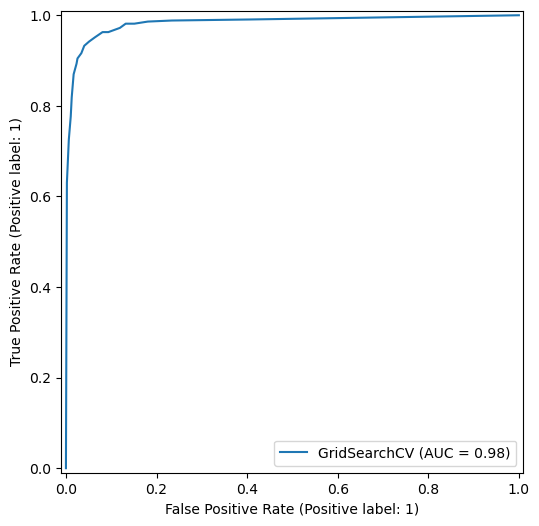

In [134]:
# for grid_model (k=20)
RocCurveDisplay.from_estimator(knn_grid_model, X_test, y_test);

In [136]:
# The AUC value of grid_model (k=20)
y_pred_proba = knn_grid_model.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:,1])

0.9830183077684316

There is little difference between the AUC values ​​of **k=9 and k=20**. Since the cost of the model will increase when k = 20, **k = 9 can be chosen for the final model.**

# <font color='orange'> <b>Final Model</b><font color='black'>  

In [149]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=9, metric='euclidean', weights='uniform'))]

final_model = Pipeline(steps=operations)

final_model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=9))])

## <font color='gold'> <b>Saving Final Model</b><font color='black'>  

In [151]:
import pickle

In [153]:
pickle.dump(final_model, open("knn_final_model", "wb"))

## <font color='gold'> <b>Opening/Loading Final Model</b><font color='black'>  

In [158]:
loaded_model = pickle.load(open("knn_final_model", "rb"))

## <font color='gold'> <b>Prediction</b><font color='black'>  

In [160]:
# new data
my_dict = {"Gene One": [1.1, 3.2, 4.1, 5.7, 7.2, 9.3, 2.1, 6.1],
           "Gene Two": [1.2, 4.1, 4.2, 5.4, 6.8, 9.2, 7.9, 1.1]
          }

In [162]:
samples = pd.DataFrame(my_dict)
samples

,Gene One,Gene Two
0,1.1,1.2
1,3.2,4.1
2,4.1,4.2
3,5.7,5.4
4,7.2,6.8
5,9.3,9.2
6,2.1,7.9
7,6.1,1.1


In [164]:
predictions = loaded_model.predict(samples)
predictions_proba = loaded_model.predict_proba(samples)

In [166]:
samples["pred"] = predictions
samples["pred_proba_1"] = predictions_proba[:,1]
samples["pred_proba_0"] = predictions_proba[:,0]
samples

,Gene One,Gene Two,pred,pred_proba_1,pred_proba_0
0,1.1,1.2,0,0.000000,1.000000
1,3.2,4.1,0,0.111111,0.888889
2,4.1,4.2,1,0.888889,0.111111
3,5.7,5.4,0,0.111111,0.888889
4,7.2,6.8,0,0.000000,1.000000
5,9.3,9.2,1,1.000000,0.000000
6,2.1,7.9,0,0.000000,1.000000
7,6.1,1.1,1,1.000000,0.000000


<p style="background-color:orange;font-family:newtimeroman;font-size:200%;color:black;text-align:center;border-radius:40px 20px;"><b>THANK YOU!</b></p>